In [1]:
import numpy as np, pickle
import matplotlib.pyplot as plt

In [3]:
# CMB fiducial (best fit Planck low + high TTTEEE)
ells, cltt, clee, clte, clpp = np.loadtxt("CMB_fiducial.dat", unpack=True)
fact = ells * (ells+1) / 2 / np.pi
factp = (ells * (ells+1))**2. / 2 / np.pi

# LiteBIRD noises from lensing reconstruction group
fnlkk = 'MCN0_500_fsky_0.80.pkl'
frlkk = 'response_fsky_0.80_mean.pkl'
N0 = pickle.load(open(fnlkk,"rb"))
R0 = pickle.load(open(frlkk,"rb"))
Lmax = 1024
L = np.linspace(0,Lmax,Lmax+1)

# Planck/SO/S4 noises from CMBX Euclid
noise_file = np.load('new_noises.npz', allow_pickle=True, encoding="latin1")
ncmbx = [noise_file[k].item() for k in ['planck', 'SO', 'S4']]
lncmbx = [np.arange(len(noise_file[k].item()['T-T'])) for k in ['planck', 'SO', 'S4']]

# LiteBIRD noises from litebird github, folder /LB_Nldd_from_FuturCMB/FUTURCMB_output
fid = np.loadtxt("liteBIRD_cl_lensed.dat") # 0:l 1:TT 2:EE 3:TE 4:BB 5:phiphi 6:TPhi 7:Ephi
tbn30 = np.loadtxt("noise_litebird_b30.dat")
tbn50 = np.loadtxt("noise_litebird_b50.dat")

# Planck noises from montepython github, folder /data
nplk1 = np.loadtxt("fake_planck_bluebook_fiducial.dat")
nplk2 = np.loadtxt("fake_planck_realistic.dat")
nplk3 = np.loadtxt("noise_fake_planck_realistic_two.dat")

# Planck lite noises
pltt0 = np.loadtxt("planck_lite_native_TT.cov")
plte0 = np.loadtxt("planck_lite_native_TE.cov")
plee0 = np.loadtxt("planck_lite_native_EE.cov")
pltt, plte, plee = [], [], []
plttR, plteR, pleeR = [], [], []
start_ell = 30
plelltt = []
for i, mid_ell in enumerate(pltt0[:, 0]):
    end_ell = 2 * int(mid_ell) - start_ell
    plelltt.append(list(range(start_ell, end_ell + 1)))
    dl = end_ell-start_ell+1
    pltt.append([
        np.sqrt(pltt0[i, 1])*pltt0[i, 0]*(pltt0[i, 0]+1)/2./np.pi/(2.7255*1e6)**2
    ]*dl)
    plttR.append([
        np.sqrt(pltt0[i, 1]*dl)*pltt0[i, 0]*(pltt0[i, 0]+1)/2./np.pi/(2.7255*1e6)**2
    ]*dl)
    start_ell = end_ell + 1
start_ell = 30
plellte = []
for i, mid_ell in enumerate(plte0[:, 0]):
    end_ell = 2 * int(mid_ell) - start_ell
    plellte.append(list(range(start_ell, end_ell + 1)))
    dl = end_ell-start_ell+1
    plte.append([
        np.sqrt(plte0[i, 1])*plte0[i, 0]*(plte0[i, 0]+1)/2./np.pi/(2.7255*1e6)**2
    ]*dl)
    plteR.append([
        np.sqrt(plte0[i, 1]*dl)*plte0[i, 0]*(plte0[i, 0]+1)/2./np.pi/(2.7255*1e6)**2
    ]*dl)
    start_ell = end_ell + 1
start_ell = 30
plellee = []
for i, mid_ell in enumerate(plee0[:, 0]):
    end_ell = 2 * int(mid_ell) - start_ell
    plellee.append(list(range(start_ell, end_ell + 1)))
    dl = end_ell-start_ell+1
    plee.append([
        np.sqrt(plee0[i, 1])*plee0[i, 0]*(plee0[i, 0]+1)/2./np.pi/(2.7255*1e6)**2
    ]*dl)
    pleeR.append([
        np.sqrt(plee0[i, 1]*dl)*plee0[i, 0]*(plee0[i, 0]+1)/2./np.pi/(2.7255*1e6)**2
    ]*dl)
    start_ell = end_ell + 1


/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


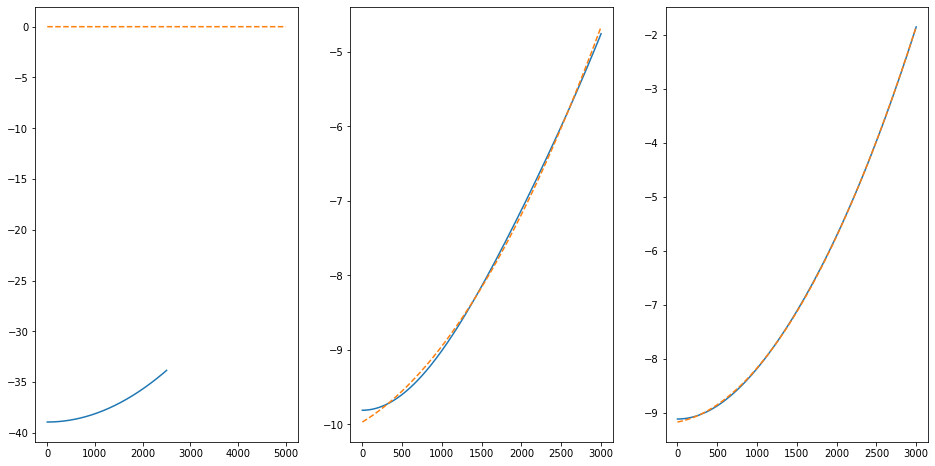

In [98]:
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
x, y = (lncmbx[0][2:], ncmbx[0]['T-T'][2:])
plt.plot(x, np.log(y))
p = np.polyfit(x, np.log(y), 2)
plt.plot(x, np.poly1d(p)(x), ls='--')
plt.subplot(1,3,2)
x, y = (nplk2[:, 0], nplk2[:, 1])
plt.plot(x, np.log(y))
p = np.polyfit(x, np.log(y), 2)
plt.plot(x, np.poly1d(p)(x), ls='--')
plt.subplot(1,3,3)
x, y = (nplk3[:, 0], nplk3[:, 1])
plt.plot(x, np.log(y))
p = np.polyfit(x, np.log(y), 2)
plt.plot(x, np.poly1d(p)(x), ls='--')

#plt.plot(lncmbx[0][2:], ncmbx[0]['T-T'][2:])
#plt.plot(nplk3[:, 0], np.log(nplk3[:, 1]))
#p = np.polyfit(nplk3[:, 0], np.log(nplk3[:, 1]),5)
#plt.plot(nplk3[:, 0], np.poly1d(p)(nplk3[:, 0]))
#plt.loglog(nplk3[:, 0], nplk3[:, 1]/(2.7255*1e6)**2.)
#sigma2 = ncmbx[0]['T-T'][2]
#theta_FWHM = 9e-4
#plt.loglog(ells, sigma2*np.exp(ells * (ells + 1) * theta_FWHM**2.), ls='--')
#sigma2 = nplk2[0, 1] / (2.7255 * 1e6)**2.
#theta_FWHM = 9e-4
#plt.loglog(nplk2[:, 0], sigma2*np.exp(nplk2[:, 0] * (nplk2[:, 0] + 1) * theta_FWHM**2.), ls='--')
#theta_FWHM = 8e-4
#plt.loglog(nplk2[:, 0], sigma2*np.exp(nplk2[:, 0] * (nplk2[:, 0] + 1) * theta_FWHM**2.), ls='--')
#plt.loglog(nplk2[:, 0], sigma2*np.exp(nplk2[:, 0]**1.5 * 50 * theta_FWHM**2.), ls='--')
#al = 1.6
#C = (np.log(nplk2[0, 1]) - np.log(nplk2[-1, 1])) / (nplk2[0, 0]**al - nplk2[-1, 0]**al)
#A = nplk2[0, 1] / np.exp(nplk2[0, 0]**al * C)
#plt.loglog(nplk2[:, 0], A*np.exp(nplk2[:, 0]**al * C), ls='--')
#al = 1.7
#C = (np.log(nplk2[0, 1]) - np.log(nplk2[-1, 1])) / (nplk2[0, 0]**al - nplk2[-1, 0]**al)
#A = nplk2[0, 1] / np.exp(nplk2[0, 0]**al * C)
#plt.loglog(nplk2[:, 0], A*np.exp(nplk2[:, 0]**al * C), ls='--')


Text(0, 0.5, '$\\ell(\\ell+1)/2\\pi C_\\ell$ (dimensionless)')

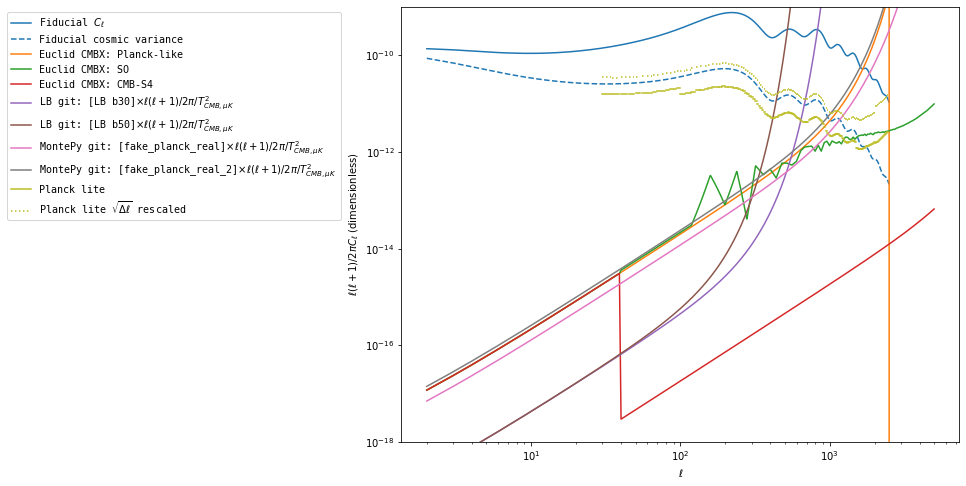

In [61]:
# TT plot
xs = [
    ells,
    ells,
    lncmbx[0][2:],
    lncmbx[1][2:],
    lncmbx[2][2:],
    tbn30[:, 0],
    tbn50[:, 0],
    nplk2[:, 0],
    nplk3[:, 0],
]
ys = [
    fact*cltt,
    fact*cltt*np.sqrt(2/(2*ell+1)),
    ncmbx[0]['T-T'][2:]*(lncmbx[0][2:]*(lncmbx[0][2:]+1))/2/np.pi,
    ncmbx[1]['T-T'][2:]*(lncmbx[1][2:]*(lncmbx[1][2:]+1))/2/np.pi,
    ncmbx[2]['T-T'][2:]*(lncmbx[2][2:]*(lncmbx[2][2:]+1))/2/np.pi,
    tbn30[:, 1]*tbn30[:, 0]*(tbn30[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
    tbn50[:, 1]*tbn50[:, 0]*(tbn50[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
    nplk2[:, 1]*nplk2[:, 0]*(nplk2[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
    nplk3[:, 1]*nplk3[:, 0]*(nplk3[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
]
ls = [
    "-",
    "--",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
]
labs = [
    r"Fiducial $C_\ell$",
    "Fiducial cosmic variance",
    "Euclid CMBX: Planck-like",
    "Euclid CMBX: SO",
    "Euclid CMBX: CMB-S4",   
    r"LB git: [LB b30]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
    r"LB git: [LB b50]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
    r"MontePy git: [fake_planck_real]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
    r"MontePy git: [fake_planck_real_2]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
]
cols = [
    "C0",
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
    "C7",
]
plt.figure(figsize=(10,8))
for x, y, l, lab, col in zip(xs, ys, ls, labs, cols):
    plt.loglog(x, y, ls=l, label=lab, color=col)
for i, (x, y1, y2) in enumerate(zip(plelltt, pltt, plttR)):
    lab = "Planck lite" if i == 0 else None
    plt.loglog(x, y1, label=lab, color="C8")
    lab = r"Planck lite $\sqrt{\Delta \ell}$ rescaled" if i == 0 else None
    plt.loglog(x, y2, label=lab, ls=':', color="C8")
plt.legend(prop={'family': 'monospace'}, bbox_to_anchor=(-0.1, 1))
plt.ylim(1e-18, 1e-09)
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)/2\pi C_\ell$ (dimensionless)")


Text(0, 0.5, '$\\ell(\\ell+1)/2\\pi C_\\ell$ (dimensionless)')

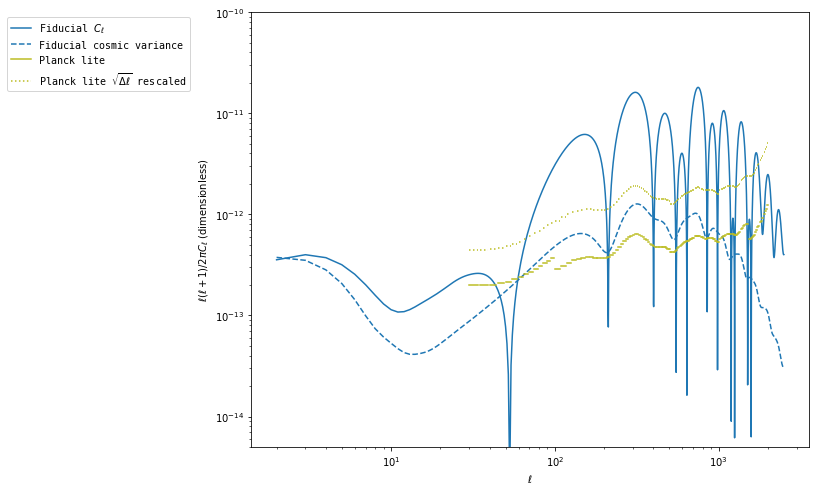

In [62]:
# TE plot
xs = [
    ells,
    ells,
]
ys = [
    fact*np.abs(clte),
    fact*np.sqrt((cltt*clee+clte**2.)/(2*ell+1)),
]
ls = [
    "-",
    "--",
]
labs = [
    r"Fiducial $C_\ell$",
    "Fiducial cosmic variance",
]
cols = [
    "C0",
    "C0",
]
plt.figure(figsize=(10,8))
for x, y, l, lab, col in zip(xs, ys, ls, labs, cols):
    plt.loglog(x, y, ls=l, label=lab, color=col)
for i, (x, y1, y2) in enumerate(zip(plellte, plte, plteR)):
    lab = "Planck lite" if i == 0 else None
    plt.loglog(x, y1, label=lab, color="C8")
    lab = r"Planck lite $\sqrt{\Delta \ell}$ rescaled" if i == 0 else None
    plt.loglog(x, y2, label=lab, ls=':', color="C8")
plt.legend(prop={'family': 'monospace'}, bbox_to_anchor=(-0.1, 1))
plt.ylim(5e-15, 1e-10)
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)/2\pi C_\ell$ (dimensionless)")


Text(0, 0.5, '$\\ell(\\ell+1)/2\\pi C_\\ell$ (dimensionless)')

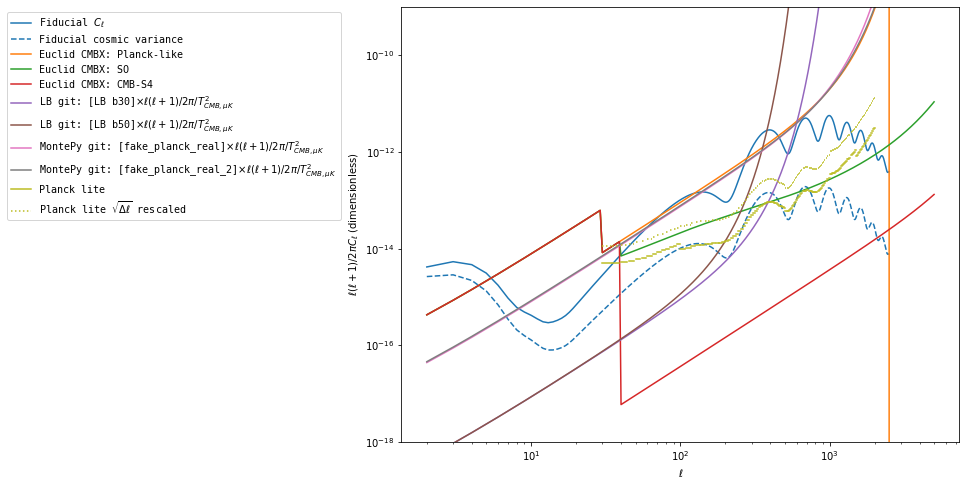

In [63]:
# EE plot
xs = [
    ells,
    ells,
    lncmbx[0][2:],
    lncmbx[1][2:],
    lncmbx[2][2:],
    tbn30[:, 0],
    tbn50[:, 0],
    nplk2[:, 0],
    nplk3[:, 0],
]
ys = [
    fact*clee,
    fact*clee*np.sqrt(2/(2*ell+1)),
    ncmbx[0]['E-E'][2:]*(lncmbx[0][2:]*(lncmbx[0][2:]+1))/2/np.pi,
    ncmbx[1]['E-E'][2:]*(lncmbx[1][2:]*(lncmbx[1][2:]+1))/2/np.pi,
    ncmbx[2]['E-E'][2:]*(lncmbx[2][2:]*(lncmbx[2][2:]+1))/2/np.pi,
    tbn30[:, 2]*tbn30[:, 0]*(tbn30[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
    tbn50[:, 2]*tbn50[:, 0]*(tbn50[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
    nplk2[:, 2]*nplk2[:, 0]*(nplk2[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
    nplk3[:, 2]*nplk3[:, 0]*(nplk3[:, 0]+1)/2./np.pi/(2.7255*1e6)**2.,
]
ls = [
    "-",
    "--",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
]
labs = [
    r"Fiducial $C_\ell$",
    "Fiducial cosmic variance",
    "Euclid CMBX: Planck-like",
    "Euclid CMBX: SO",
    "Euclid CMBX: CMB-S4",   
    r"LB git: [LB b30]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
    r"LB git: [LB b50]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
    r"MontePy git: [fake_planck_real]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
    r"MontePy git: [fake_planck_real_2]$\times \ell(\ell+1)/2\pi/T_{CMB,\mu K}^2$",
]
cols = [
    "C0",
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
    "C7",
]
plt.figure(figsize=(10,8))
for x, y, l, lab, col in zip(xs, ys, ls, labs, cols):
    plt.loglog(x, y, ls=l, label=lab, color=col)
for i, (x, y1, y2) in enumerate(zip(plellee, plee, pleeR)):
    lab = "Planck lite" if i == 0 else None
    plt.loglog(x, y1, label=lab, color="C8")
    lab = r"Planck lite $\sqrt{\Delta \ell}$ rescaled" if i == 0 else None
    plt.loglog(x, y2, label=lab, ls=':', color="C8")
plt.legend(prop={'family': 'monospace'}, bbox_to_anchor=(-0.1, 1))
plt.ylim(1e-18, 1e-09)
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell(\ell+1)/2\pi C_\ell$ (dimensionless)")


/usr/lib/python3/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


Text(0, 0.5, '$(\\ell(\\ell+1))^2/2\\pi C_\\ell$ (dimensionless)')

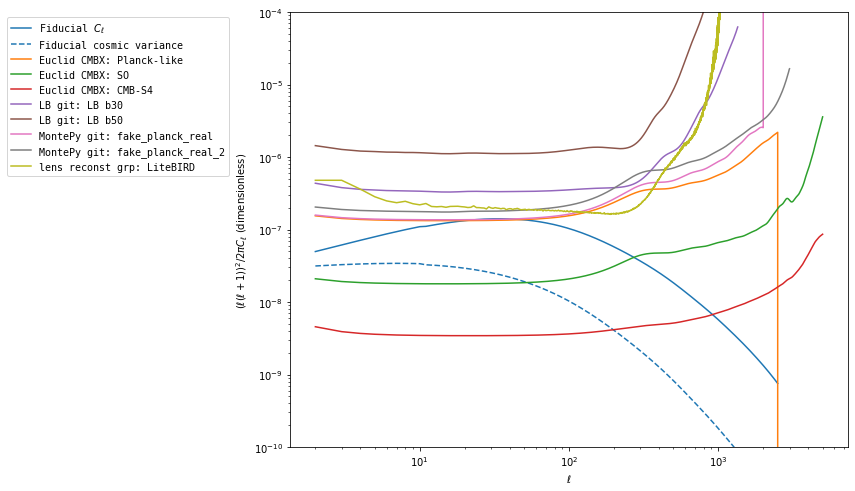

In [69]:
# phiphi plot
xs = [
    ells,
    ells,
    lncmbx[0][2:],
    lncmbx[1][2:],
    lncmbx[2][2:],
    tbn30[:, 0],
    tbn50[:, 0],
    nplk2[:, 0],
    nplk3[:, 0],
    L,
]
ys = [
    factp*clpp,
    factp*clpp*np.sqrt(2/(2*ell+1)),
    ncmbx[0]['phi-phi'][2:]*(lncmbx[0][2:]*(lncmbx[0][2:]+1))**2./2/np.pi,
    ncmbx[1]['phi-phi'][2:]*(lncmbx[1][2:]*(lncmbx[1][2:]+1))**2./2/np.pi,
    ncmbx[2]['phi-phi'][2:]*(lncmbx[2][2:]*(lncmbx[2][2:]+1))**2./2/np.pi,
    tbn30[:, 3],
    tbn50[:, 3],
    nplk2[:, 3],
    nplk3[:, 3],
    (L*(L+1))**2*N0/R0**2/2/np.pi,
]
ls = [
    "-",
    "--",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
    "-",
]
labs = [
    r"Fiducial $C_\ell$",
    "Fiducial cosmic variance",
    "Euclid CMBX: Planck-like",
    "Euclid CMBX: SO",
    "Euclid CMBX: CMB-S4",   
    "LB git: LB b30",
    "LB git: LB b50",
    "MontePy git: fake_planck_real",
    "MontePy git: fake_planck_real_2",
    "lens reconst grp: LiteBIRD",
]
cols = [
    "C0",
    "C0",
    "C1",
    "C2",
    "C3",
    "C4",
    "C5",
    "C6",
    "C7",
    "C8",
]
plt.figure(figsize=(10,8))
for x, y, l, lab, col in zip(xs, ys, ls, labs, cols):
    plt.loglog(x, y, ls=l, label=lab, color=col)
plt.legend(prop={'family': 'monospace'}, bbox_to_anchor=(-0.1, 1))
plt.ylim(1e-10, 1e-04)
plt.xlabel(r"$\ell$")
plt.ylabel(r"$(\ell(\ell+1))^2/2\pi C_\ell$ (dimensionless)")


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from getdist.plots import getPlotter
from getdist.mcsamples import loadMCSamples

In [5]:
fnames_1 = [
    "chains/2023_02_01_P18-298-2508_LCDM",
    "chains/2023_02_02_fakeP18-298-2508_LCDM",
    "chains/2023_02_03_fakeP18-298-2508-noise1_LCDM",
    "chains/2023_02_08_fakeP18-298-2508-noise2_LCDM",
    "chains/2023_02_09_fakeP18-298-2508-PlanckLiteNoise_LCDM",
]
fnames_2 = [
    "chains/2023_02_01_P18-496-2508_LCDM",
    "chains/2023_02_02_fakeP18-496-2508_LCDM",
    "chains/2023_02_03_fakeP18-496-2508-noise1_LCDM",
    "chains/2023_02_08_fakeP18-496-2508-noise2_LCDM",
    "chains/2023_02_09_fakeP18-496-2508-PlanckLiteNoise_LCDM",
]

labels_1 = [
    'real Planck ell=[298-2508]',
    'fake Planck with CMBX noise',
    'fake Planck with Lewis noise',
    'fake Planck with Thejs noise',
    'fake Planck with Planck Lite noise',
]
labels_2 = [
    'real Planck ell=[496-2508]',
    'fake Planck with CMBX noise',
    'fake Planck with Lewis noise',
    'fake Planck with Thejs noise',
    'fake Planck with Planck Lite noise',
]

In [7]:
MCs_1 = []
MCs_2 = []
for fname in fnames_1:
    MCs_1.append(loadMCSamples(f"./{fname}_gdist"))
for fname in fnames_2:
    MCs_2.append(loadMCSamples(f"./{fname}_gdist"))

./chains/2023_02_01_P18-298-2508_LCDM_gdist.txt
Removed no burn in
./chains/2023_02_02_fakeP18-298-2508_LCDM_gdist.txt
Removed no burn in
./chains/2023_02_03_fakeP18-298-2508-noise1_LCDM_gdist.txt
Removed no burn in
./chains/2023_02_08_fakeP18-298-2508-noise2_LCDM_gdist.txt
Removed no burn in
./chains/2023_02_09_fakeP18-298-2508-PlanckLiteNoise_LCDM_gdist.txt
Removed no burn in
./chains/2023_02_01_P18-496-2508_LCDM_gdist.txt
Removed no burn in
./chains/2023_02_02_fakeP18-496-2508_LCDM_gdist.txt
Removed no burn in
./chains/2023_02_03_fakeP18-496-2508-noise1_LCDM_gdist.txt
Removed no burn in
./chains/2023_02_08_fakeP18-496-2508-noise2_LCDM_gdist.txt
Removed no burn in
./chains/2023_02_09_fakeP18-496-2508-PlanckLiteNoise_LCDM_gdist.txt
Removed no burn in


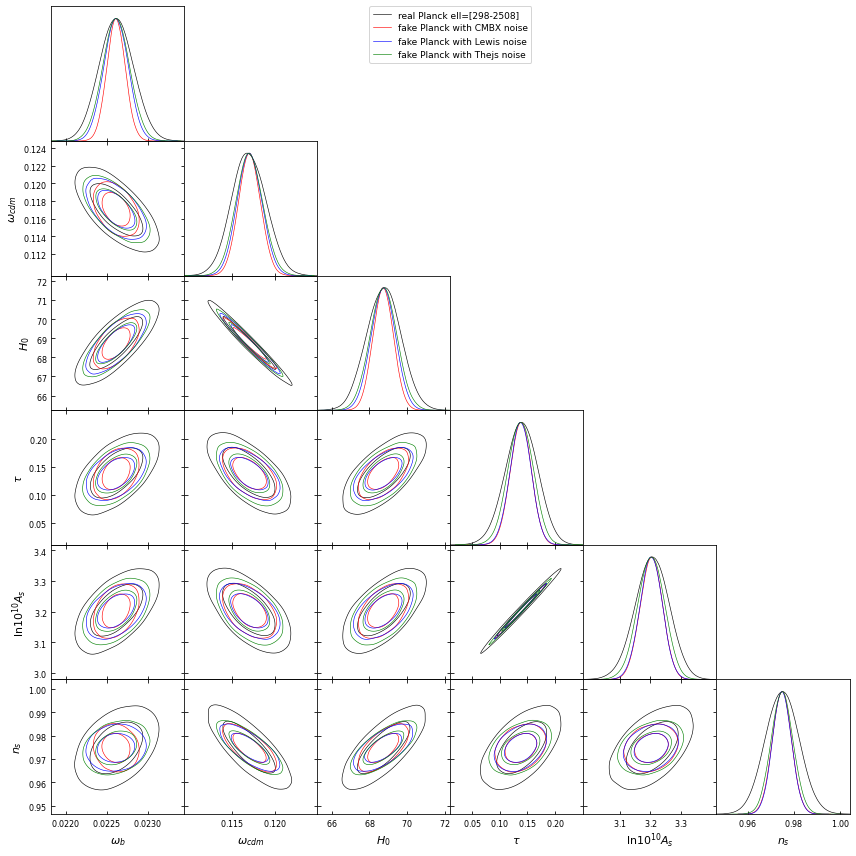

In [10]:
g = getPlotter()
g.triangle_plot(
    MCs_1[:-1],
    ["omega_b","omega_cdm","H0","tau_reio","ln10^{10}A_s","n_s"],
    legend_labels=labels_1[:-1],
)

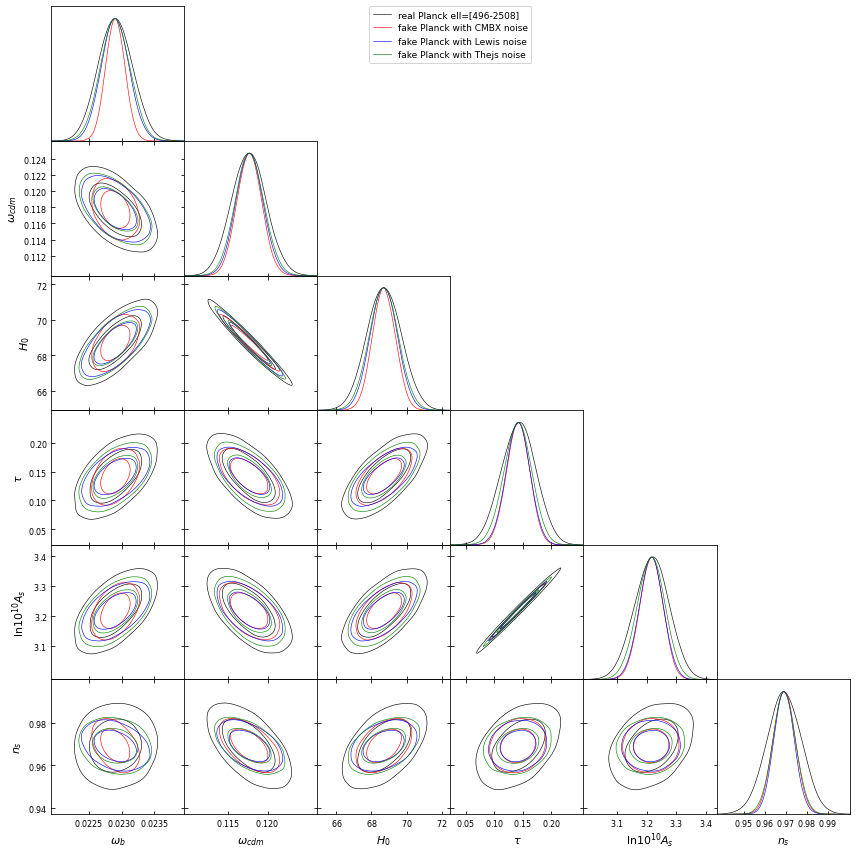

In [11]:
g = getPlotter()
g.triangle_plot(
    MCs_2[:-1],
    ["omega_b","omega_cdm","H0","tau_reio","ln10^{10}A_s","n_s"],
    legend_labels=labels_2[:-1],
)

In [16]:
# Rescale the samples according to the std dev of the "real" Planck chain
std_ref = MCs_1[0].samples.std(axis=0)[:6]
ratios_1 = []
for i in range(len(MCs_1)-2):
    std = MCs_1[i+1].samples.std(axis=0)[:6]
    ratio = np.mean(std_ref / std)
    ratios_1.append(ratio)
    me = MCs_1[i+1].samples.mean(axis=0)[:6]
    MCs_1[i+1].samples[:, :6] = MCs_1[i+1].samples[:, :6] * ratio + (1 - ratio) * me
std_ref = MCs_2[0].samples.std(axis=0)[:6]
ratios_2 = []
for i in range(len(MCs_2)-2):
    std = MCs_2[i+1].samples.std(axis=0)[:6]
    ratio = np.mean(std_ref / std)
    ratios_2.append(ratio)
    me = MCs_2[i+1].samples.mean(axis=0)[:6]
    MCs_2[i+1].samples[:, :6] = MCs_2[i+1].samples[:, :6] * ratio + (1 - ratio) * me

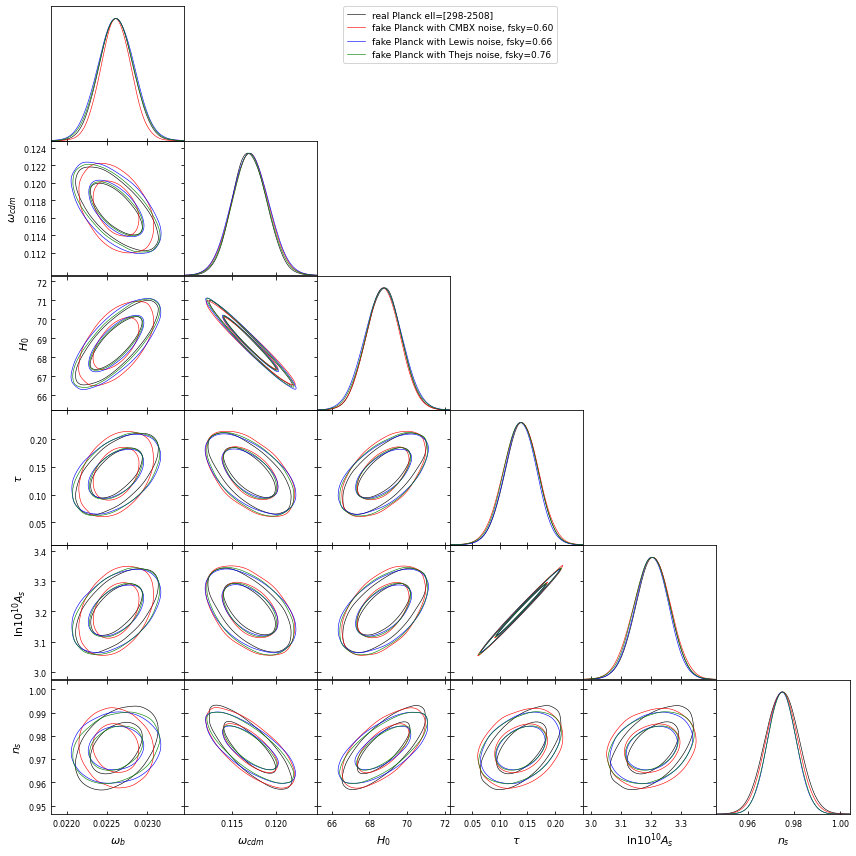

In [17]:
g = getPlotter()
labels_1b = [labels_1[0]] + [labels_1[i]+", fsky=%.2f"%(1/ratios_1[i-1]) for i in range(1,4)] + [labels_1[4]]
g.triangle_plot(
    MCs_1[:-1],
    ["omega_b","omega_cdm","H0","tau_reio","ln10^{10}A_s","n_s"],
    legend_labels=labels_1b[:-1],
)

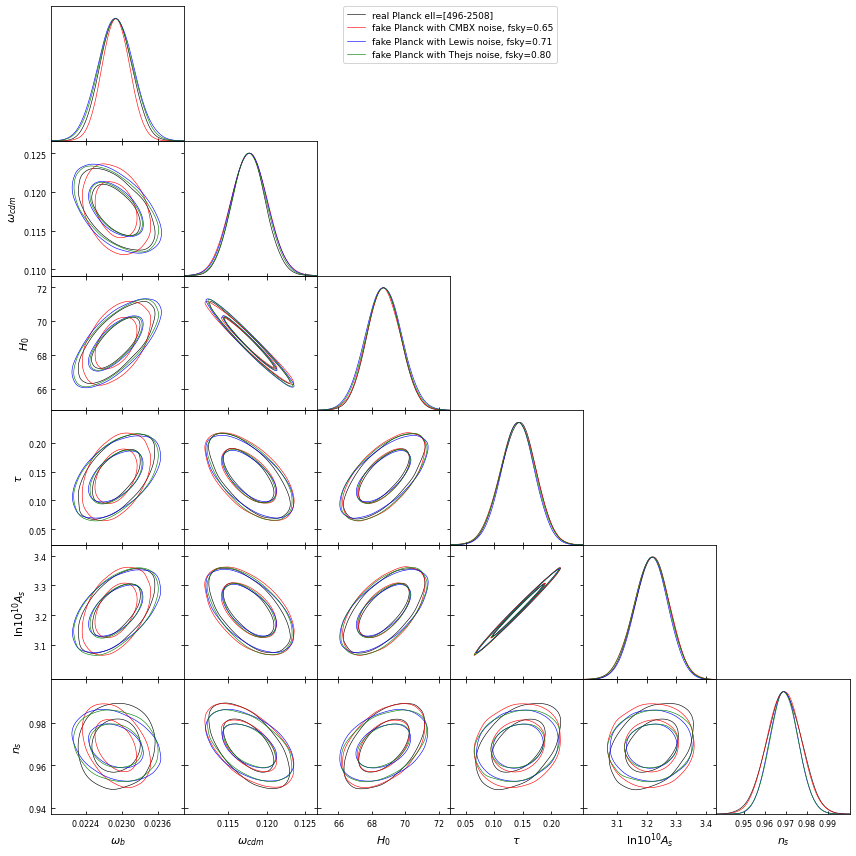

In [18]:
g = getPlotter()
labels_2b = [labels_2[0]] + [labels_2[i]+", fsky=%.2f"%(1/ratios_2[i-1]) for i in range(1,4)] + [labels_2[4]]
g.triangle_plot(
    MCs_2[:-1],
    ["omega_b","omega_cdm","H0","tau_reio","ln10^{10}A_s","n_s"],
    legend_labels=labels_2b[:-1],
)

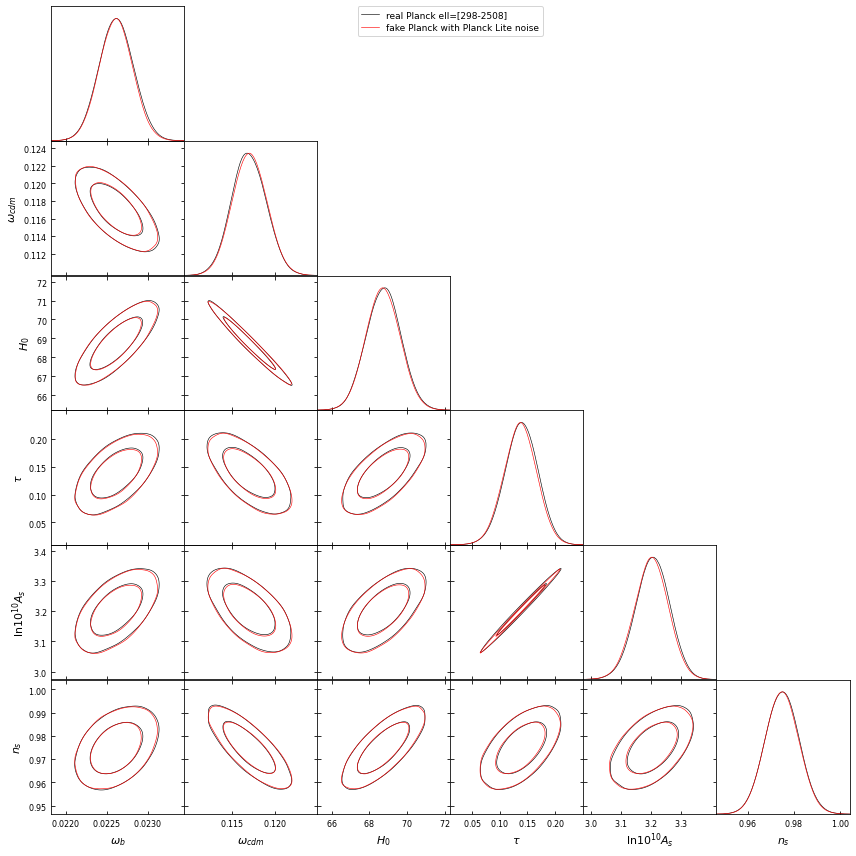

In [12]:
g = getPlotter()
g.triangle_plot(
    [MCs_1[0], MCs_1[-1]],
    ["omega_b","omega_cdm","H0","tau_reio","ln10^{10}A_s","n_s"],
    legend_labels=[labels_1[0], labels_1[-1]]
)

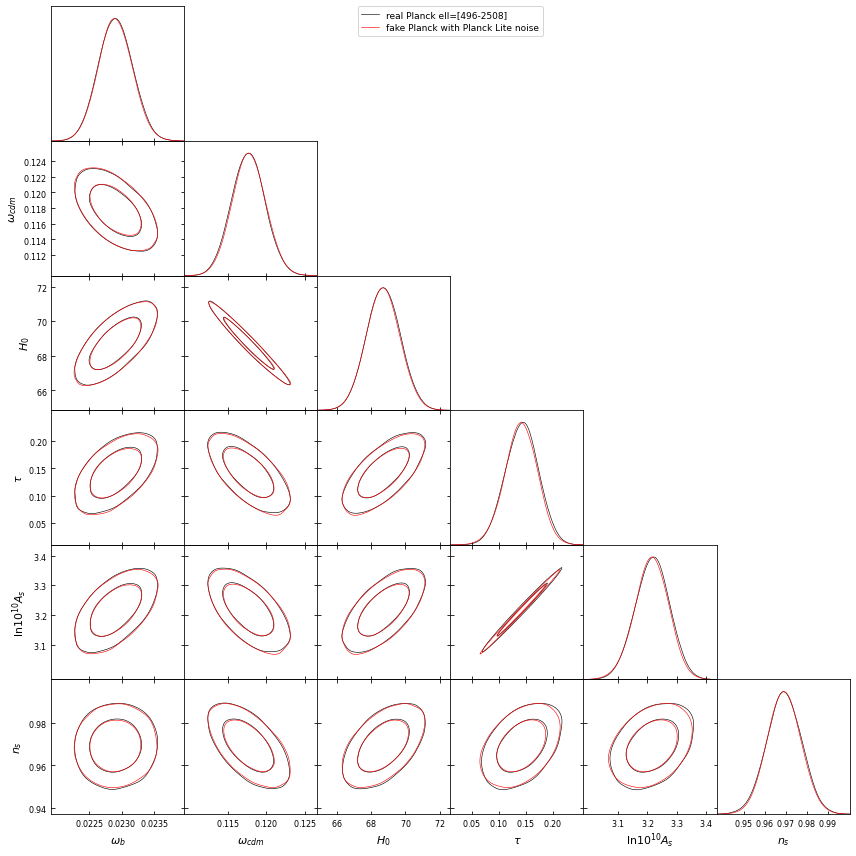

In [13]:
g = getPlotter()
g.triangle_plot(
    [MCs_2[0], MCs_2[-1]],
    ["omega_b","omega_cdm","H0","tau_reio","ln10^{10}A_s","n_s"],
    legend_labels=[labels_2[0], labels_2[-1]]
)